<a href="https://colab.research.google.com/github/Soumo31428/PolynomialRegressionImplementation/blob/main/Polynomial_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y Dataset')

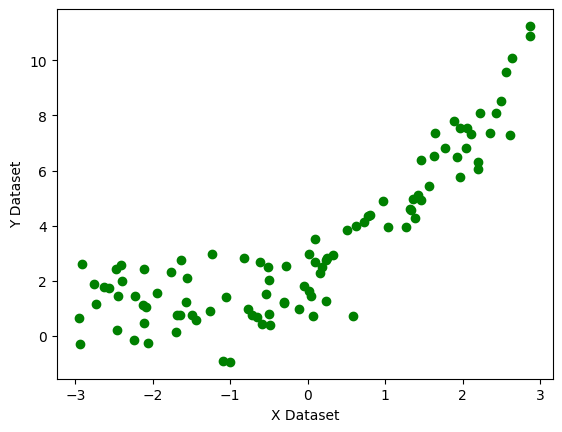

In [4]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)
## quadratic equation used y=0.5x^2+1.5x+2+outliers
plt.scatter(x,y, color = 'g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [5]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [6]:
## Let's implemeny simple linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
r2_score(ytest, reg.predict(xtest))

0.513261169461364

Text(0, 0.5, 'Y Dataset')

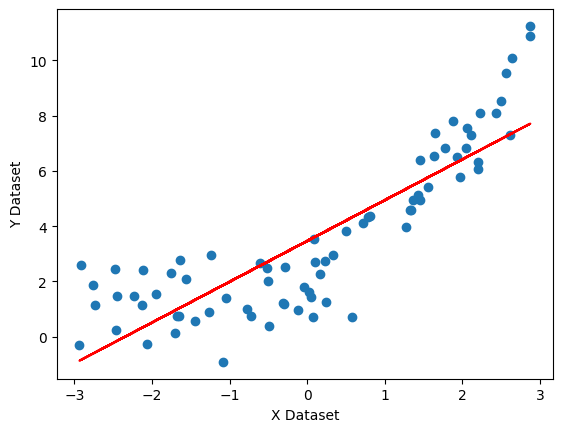

In [8]:
## Let's visualize this model
plt.plot(xtrain, reg.predict(xtrain),color = 'r')
plt.scatter(xtrain,ytrain)
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [10]:
## Let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias = True)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

In [11]:
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(xtrain_poly, ytrain)
score = r2_score(ytest, model.predict(xtest_poly))
print(score)

0.8261350699783978


In [14]:
print(model.coef_)
print(model.intercept_)

[[0.         1.4658695  0.46945006]]
[2.12815362]


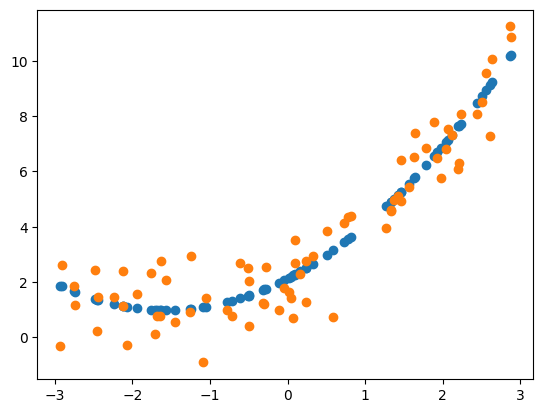

In [17]:
plt.scatter(xtrain, model.predict(xtrain_poly))
plt.scatter(xtrain,ytrain)

In [18]:
poly2 = PolynomialFeatures(degree = 3, include_bias = True)
xtrain_poly2 = poly2.fit_transform(xtrain)
xtest_poly2 = poly2.transform(xtest)

In [19]:
from sklearn.metrics import r2_score
model2 = LinearRegression()
model2.fit(xtrain_poly2, ytrain)
score2 = r2_score(ytest, model2.predict(xtest_poly2))
print(score2)

0.81925475365805


In [21]:
## Prediction of new data set
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

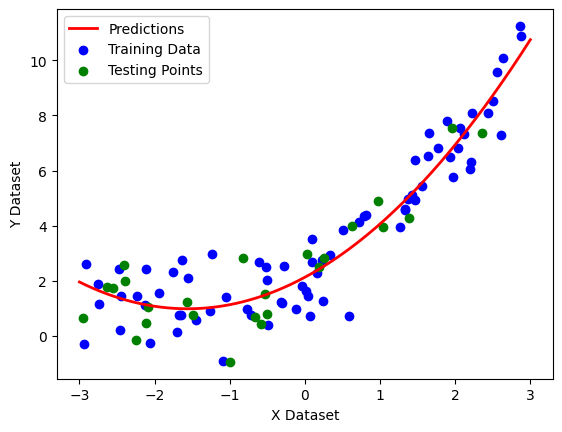

In [31]:
y_new = model.predict(x_new_poly)
plt.plot(x_new, y_new, 'r', linewidth = 2, label = 'Predictions')
plt.scatter(xtrain, ytrain, color = 'b', label = 'Training Data')
plt.scatter(xtest,ytest, color = 'g', label = 'Testing Points')

plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.legend()
plt.show()

In [ ]:
-